# Análise de Dados

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('casas_limpo.xlsx')

In [72]:
# Média do tamanho dos imóveis (metragem m²)

media_metragem_imoveis = df['metragem(m²)'].mean()
print(f'A média da metragem dos imóveis é de: {media_metragem_imoveis:.2f} m²')

A média da metragem dos imóveis é de: 350.79 m²


In [73]:
# Média do número de quartos, banheiros e vagas
media_banheiros, media_quartos, media_vagas = df['banheiros'].mean(), df['quartos'].mean(), df['vagas'].mean()
print(f'Média de Quartos: {round(media_quartos)} \nMédia de Banheiros: {round(media_banheiros)} \nMédia de Vagas: {round(media_vagas)}')

Média de Quartos: 2 
Média de Banheiros: 2 
Média de Vagas: 1


In [74]:
# Média do IPTU e Condomínio
media_iptu, media_condominio = df['iptu'].mean(), df['condominio'].mean()
print(f'Média de IPTU: {media_iptu:.2f} R$ \nMédia de Condomínio: {media_condominio:.2f} R$')

Média de IPTU: 173.05 R$ 
Média de Condomínio: 307.37 R$


In [75]:
# correlação entre o valor do imóvel e o tamanho em metros quadrados
correlacao_valor_tamanho = df['valor'].corr(df['metragem(m²)'])
print(correlacao_valor_tamanho)

# positivo e alto (por exemplo, acima de 0,7), significa que, em média, imóveis maiores tendem a ter um valor mais alto.

# negativo (por exemplo, abaix de -0,5), pode indicar que imóveis maiores estão sendo vendidos por preços mais baixos, o que seria uma correlação curiosa, mas ainda possível dependendo do contexto.

# próxima de 0, pode indicar que o tamanho do imóvel não está fortemente relacionado ao seu valor.

-0.007423768266273241


### Não há relação definida entre tamanho e valor do imóvel

O valor da correlação foi aproximadamente -0,007

O que significa que a relação entre o tamanho e o valor do imóvel é praticamente nula;

Não sendo possível atrelar uma linear /razão proporcional entre valor e metragem;

Ou seja, imóveis maiores não necessariamente são mais caros, e imóveis menores não necessariamente são mais baratos.

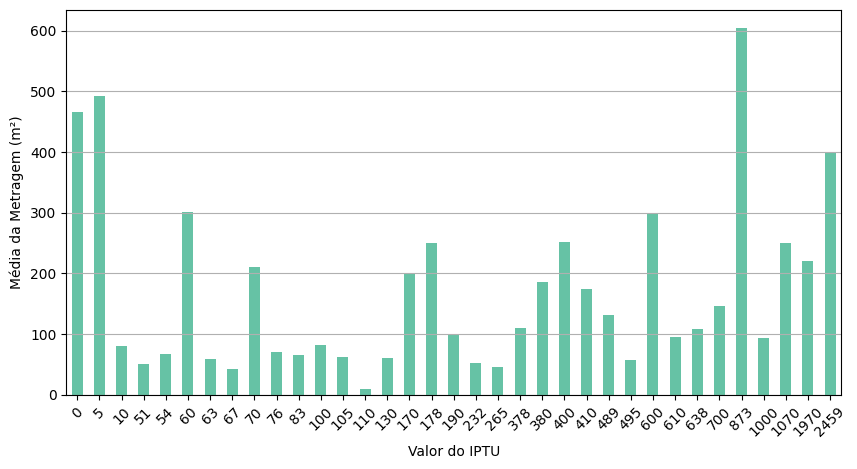

In [76]:
# imoveis maiores tem IPTU mais alto
proporcao_iptu_metragem = df.groupby('iptu')['metragem(m²)'].mean()

proporcao_iptu_metragem.plot(kind='bar', figsize=(10,5), colormap='Set2')
plt.ylabel('Média da Metragem (m²)')
plt.xlabel('Valor do IPTU')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

### Não há relação definida entre o tamanho do imóvel e o IPTU

Os valores dependem de outras variáveis como a localização, quantidade de vagas, etc

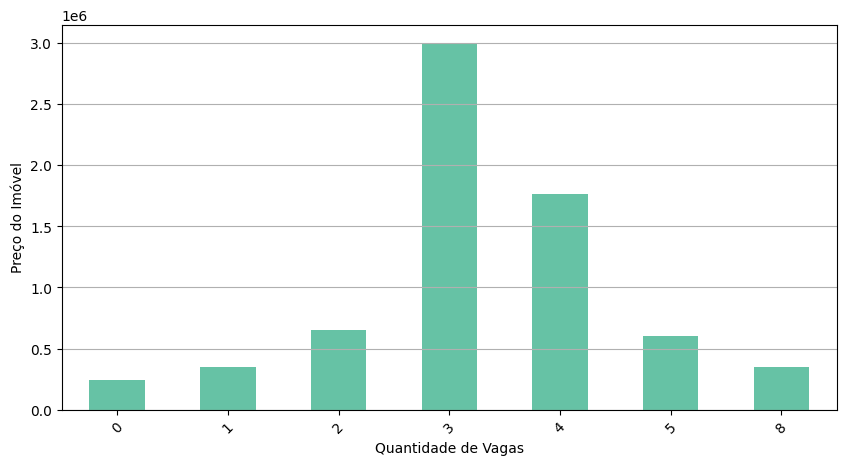

In [77]:
# quantidade de vagas de garagem está relacionada ao preço do imóvel?
relacao_qntVagas_precoImovel = df.groupby('vagas')['valor'].mean()

relacao_qntVagas_precoImovel.plot(kind='bar', figsize=(10,5), colormap='Set2')
plt.ylabel('Preço do Imóvel')
plt.xlabel('Quantidade de Vagas')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

# Casas com 3 e 4 vagas possuem os valores mais altos em relação a quantidade de vagas

Maior número de vagas, especificamente entre 3 e 4, estão relacionadas a preços mais altos nos imóveis

In [78]:
# preços muito altos ou baixos em relação a MÉDIA
# metragem muito acima ou abaixo da MÉDIA
import numpy as np

media_valor = df['valor'].mean()
media_metragem = df['metragem(m²)'].mean()

valor_q1 = df['valor'].quantile(0.25)
valor_q3 = df['valor'].quantile(0.75)
valor_iqr = valor_q3 - valor_q1

metragem_q1 = df['metragem(m²)'].quantile(0.25)
metragem_q3 = df['metragem(m²)'].quantile(0.75)
metragem_iqr = metragem_q3 - metragem_q1


valor_limite_minimo = valor_q1 - 1.5 * valor_iqr
valor_limite_maximo = valor_q3 + 1.5 * valor_iqr

metragem_limite_minimo = metragem_q1 - 1.5 * metragem_iqr
metragem_limite_maximo = metragem_q3 + 1.5 * metragem_iqr


outliers_valor_abaixo = df[df['valor'] < valor_limite_minimo]
outliers_valor_acima = df[df['valor'] > valor_limite_maximo]

print(f'{valor_limite_maximo, valor_limite_minimo}')

print("Imóveis com VALOR muito abaixo do esperado:")
display(outliers_valor_abaixo)

print("Imóveis com VALOR muito acima do esperado:")
display(outliers_valor_acima)



# exibição
outliers_metragem_abaixo = df[df['metragem(m²)'] < metragem_limite_minimo]
outliers_metragem_acima = df[df['metragem(m²)'] > metragem_limite_maximo]

print("Imóveis com METRAGEM muito abaixo do esperado:")
display(outliers_metragem_abaixo)

print("Imóveis com METRAGEM muito acima do esperado:")
display(outliers_metragem_acima)

(np.float64(855000.0), np.float64(-145000.0))
Imóveis com VALOR muito abaixo do esperado:


,metragem(m²),quartos,banheiros,vagas,valor,nomeRua,condominio,iptu


Imóveis com VALOR muito acima do esperado:


,metragem(m²),quartos,banheiros,vagas,valor,nomeRua,condominio,iptu
0,604,4,7,3,11800000,Alameda Mamoré,1659,873
9,250,3,5,4,1700000,Rua Dos Cravos,796,178
13,109,3,3,2,1489970,Rua Dona Brígida,1600,638
16,163,3,5,3,1772750,Rua Doutor Rubens Awada,0,0
18,58,1,1,1,979970,Rua José Augusto Penteado,1023,495
21,132,3,2,2,1649980,Avenida Jurema,2323,489
23,220,4,4,4,2349980,Rua Gabriele D'Annunzio,3200,1970
24,132,3,2,2,1649970,Avenida Jurema,2323,489
27,190,3,5,4,1490000,Estrada Velha Indaiatuba - Campinas,0,0
36,110,2,1,1,1619990,Rua Alvorada,1000,378


Imóveis com METRAGEM muito abaixo do esperado:


,metragem(m²),quartos,banheiros,vagas,valor,nomeRua,condominio,iptu


Imóveis com METRAGEM muito acima do esperado:


,metragem(m²),quartos,banheiros,vagas,valor,nomeRua,condominio,iptu
0,604,4,7,3,11800000,Alameda Mamoré,1659,873
38,504,0,0,0,230000,Rua Lessa Paranhos,0,60
39,786,0,0,0,280000,Rua Theodoro Brauko,0,0
53,1000,0,0,0,280000,Rua Moacyr Corrêa,0,0
75,20000,0,0,0,250000,Rua 1,0,0
92,492,0,0,0,230000,Rua Serra Do Itapetinga,300,5
101,525,0,0,0,270000,Rua Geraldo Vieira Dos Santos,550,0
